In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df.shape

(1338, 7)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1337, 7)

In [9]:
# check for male and female
df["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [10]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# visualization part


Text(0.5, 1.0, 'male vs female count')

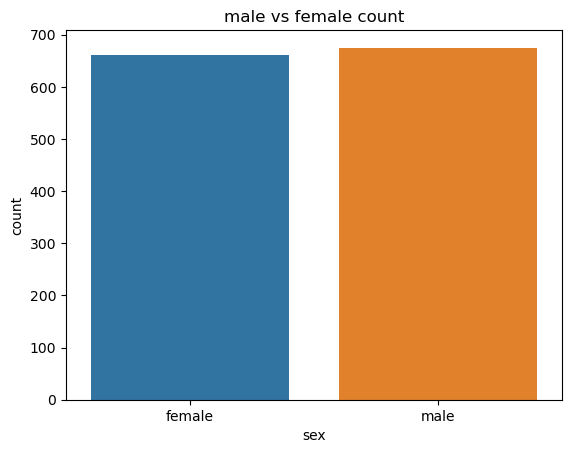

In [12]:
sns.countplot(x="sex",data=df)
plt.title("male vs female count")

Male and female Ratio is well balanced

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

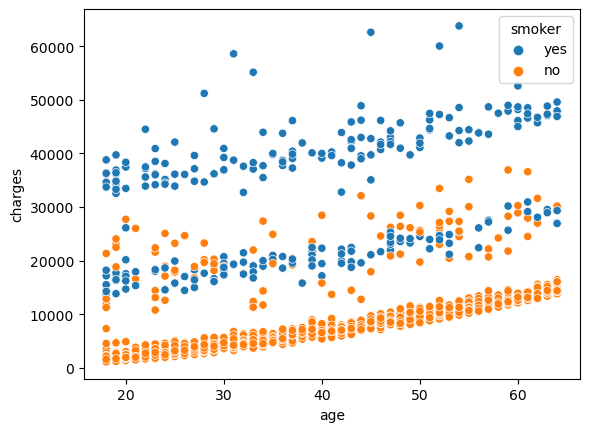

In [14]:
sns.scatterplot(x="age",y="charges",hue="smoker",data=df)

charges are high for smokers

Text(0.5, 1.0, 'Smoker vs charges')

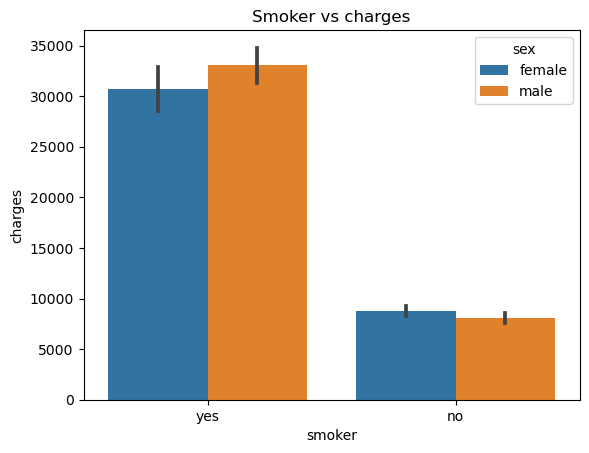

In [15]:
sns.barplot(x="smoker",y="charges",hue="sex",data=df)
plt.title("Smoker vs charges")

smoker charges are high as compare to non-smoker

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='bmi', ylabel='charges'>

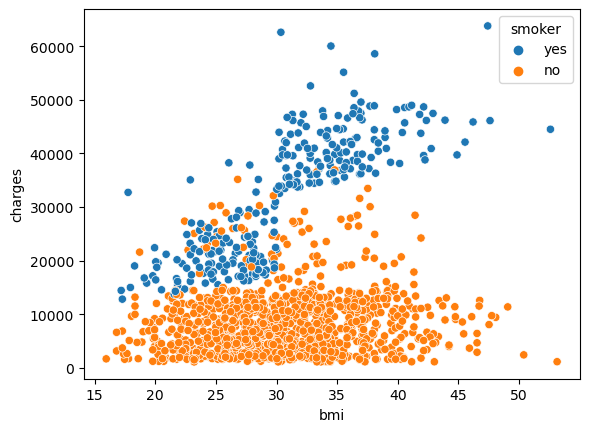

In [17]:
sns.scatterplot(x="bmi",y="charges",hue="smoker",data=df)

in smoker charges increases by increase in bmi and it not for nonsmoker

<Axes: xlabel='region', ylabel='charges'>

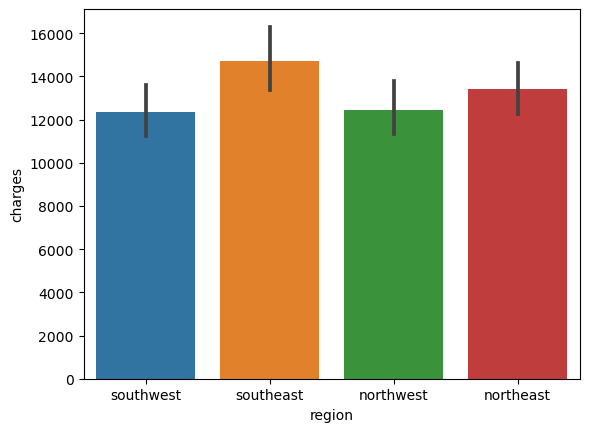

In [18]:
sns.barplot(x="region",y="charges",data=df)

there is minor difference in charges by region or you can say partially equal

In [19]:
df.groupby("region")["charges"].sum()

region
northeast    4.343669e+06
northwest    4.034072e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='children', ylabel='Density'>

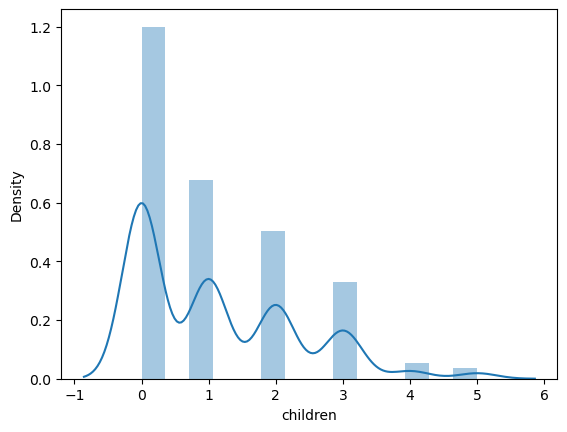

In [21]:
sns.distplot(df["children"])

<Axes: xlabel='bmi', ylabel='Density'>

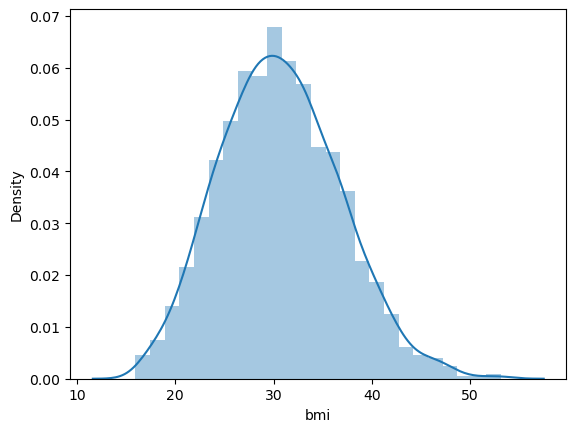

In [22]:
sns.distplot(df["bmi"])

<Axes: xlabel='charges', ylabel='Density'>

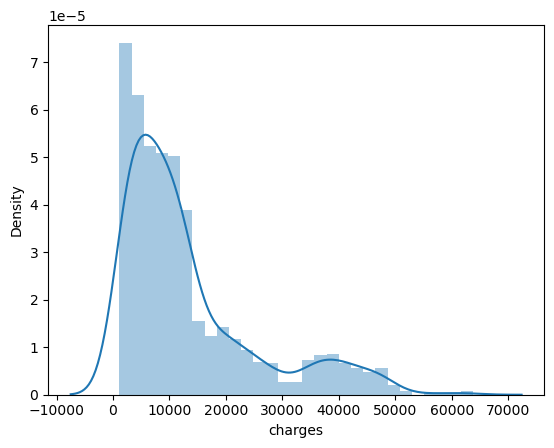

In [23]:
sns.distplot(df["charges"])

<Axes: xlabel='charges', ylabel='Density'>

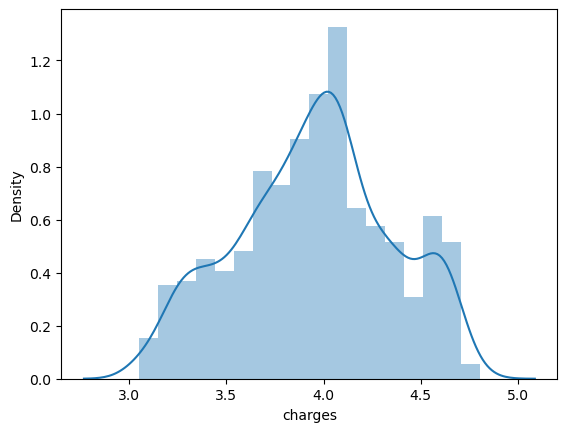

In [24]:
sns.distplot(np.log10(df["charges"]))

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df["smoker"]=le.fit_transform(df["smoker"])

In [28]:
df["region"]=le.fit_transform(df["region"])
df["sex"]=le.fit_transform(df["sex"])

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

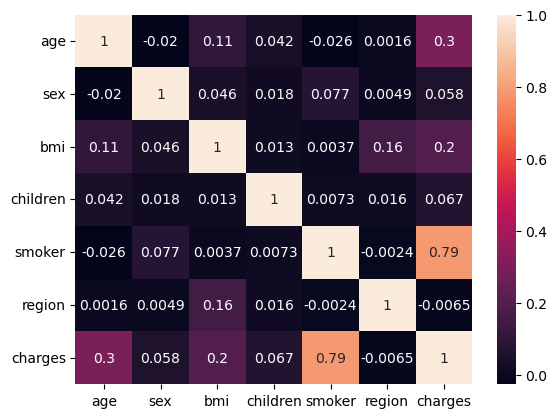

In [30]:
sns.heatmap(df.corr(),annot=True)

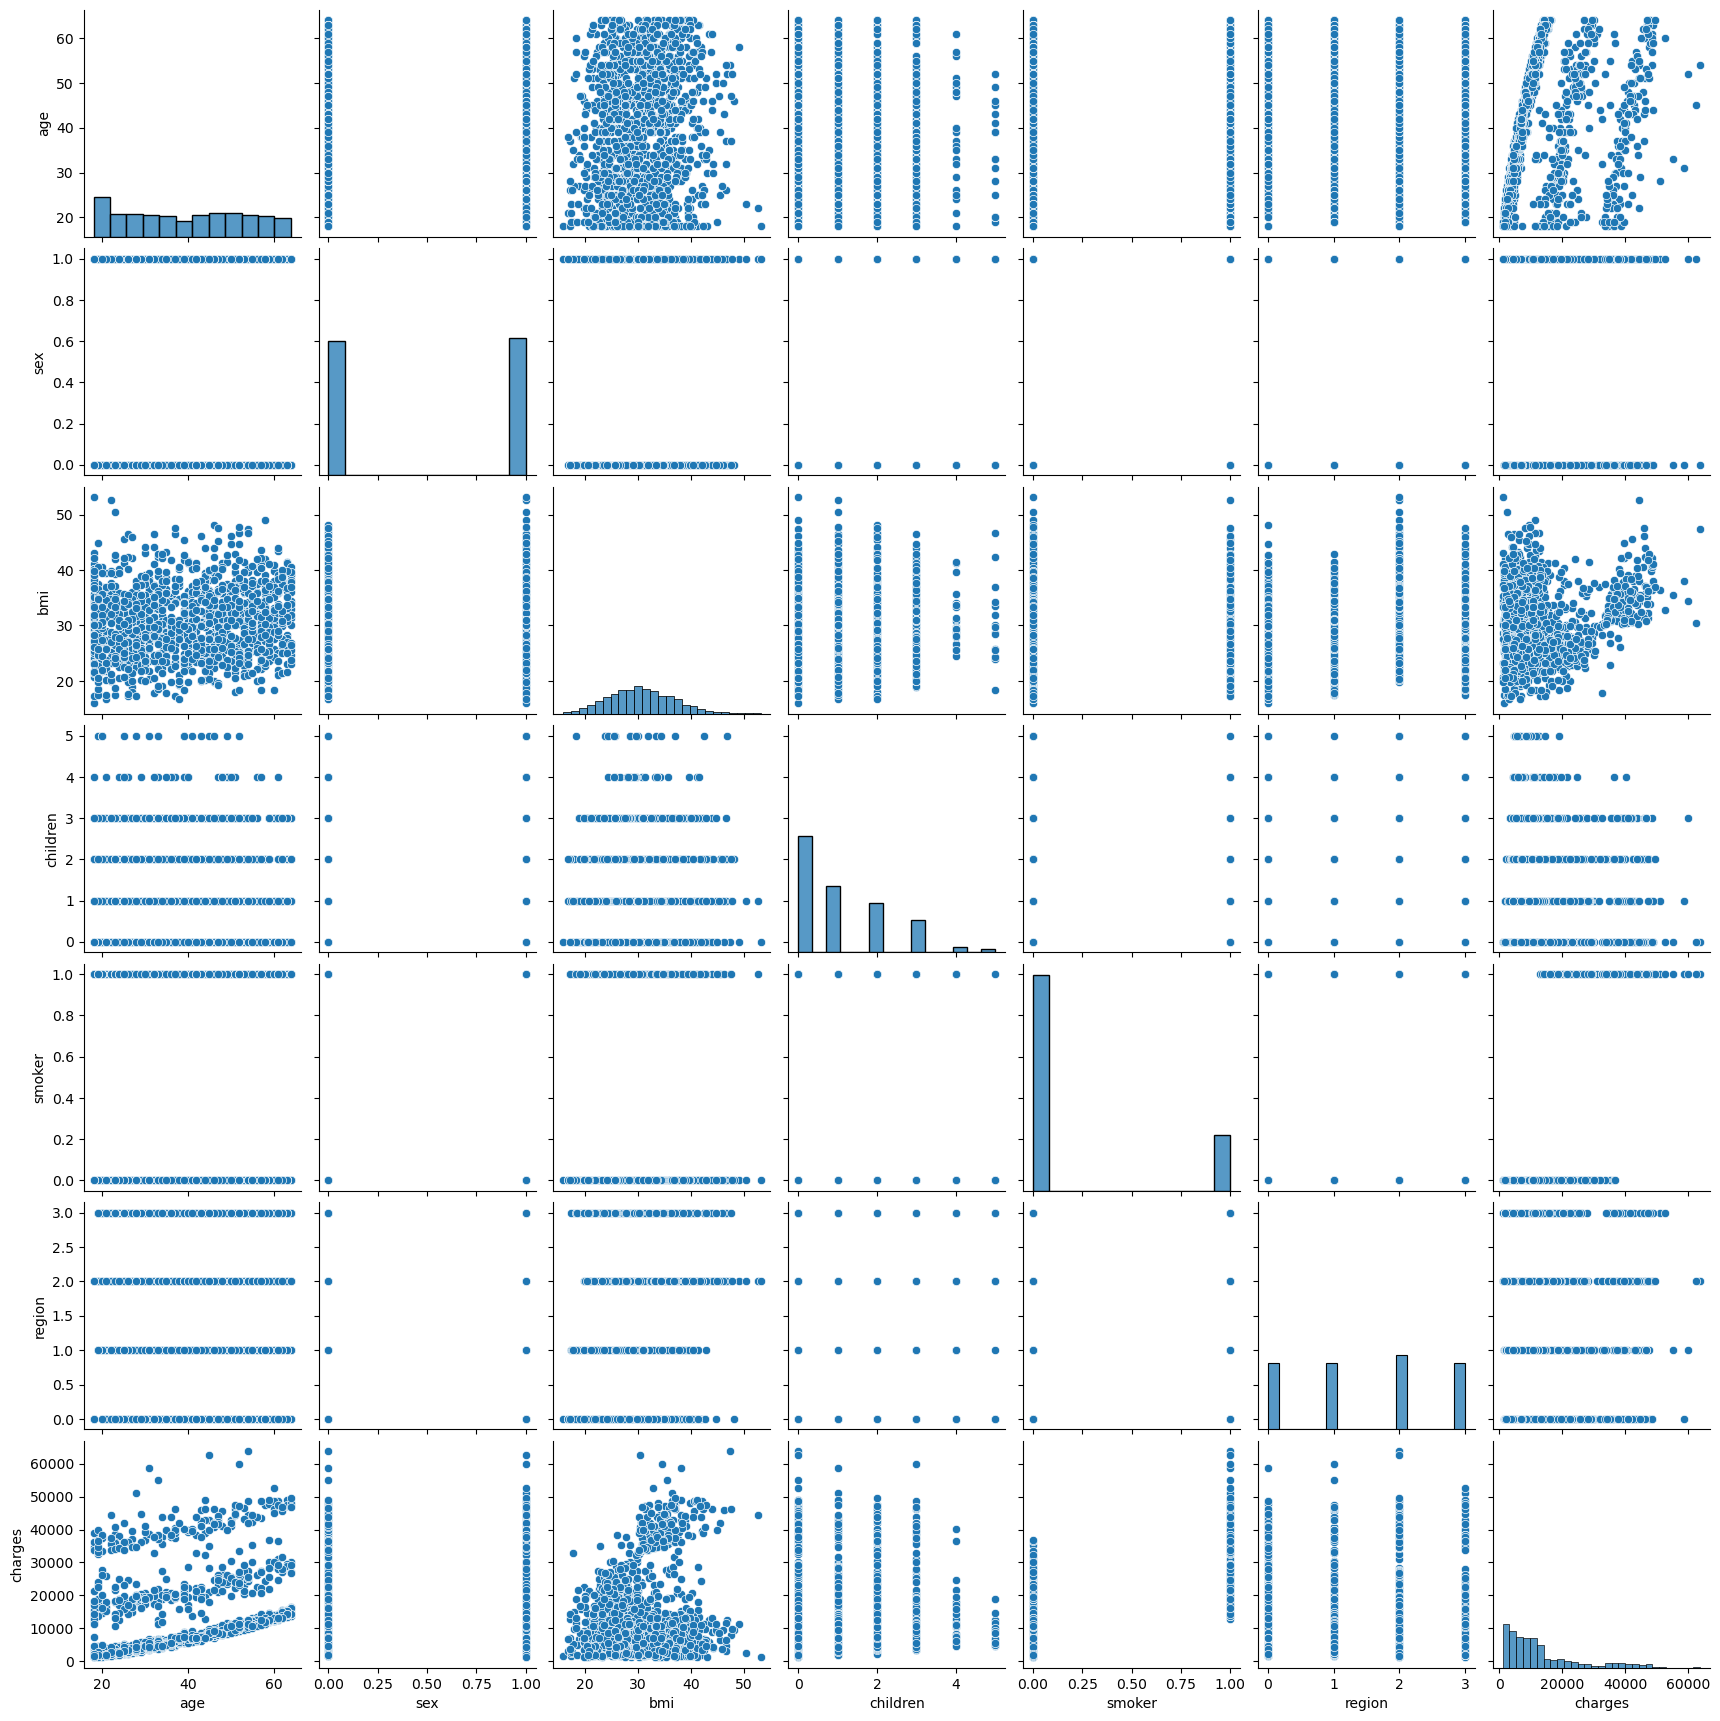

In [31]:
sns.pairplot(df)

#### Model Building

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix


In [33]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

In [35]:
for name,model in models.items():
    print("\n")
    print(f"Model name:{name}\n------------------------------")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"Score:{model.score(x_test,y_test)}")
    
    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')
          
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')




Model name:LR
------------------------------
Score:0.806846632262911
Training R-squared: 0.7297182858804965
Testing R-squared: 0.806846632262911
Mean Squared Error: 35493102.61165055
Mean Absolute Error: 4182.353155288301


Model name:RF
------------------------------
Score:0.8941413070767925
Training R-squared: 0.921725649730723
Testing R-squared: 0.8941413070767925
Mean Squared Error: 19452176.756103978
Mean Absolute Error: 2496.041100718945


Model name:DT
------------------------------
Score:0.764706018571965
Training R-squared: 1.0
Testing R-squared: 0.764706018571965
Mean Squared Error: 43236695.91977526
Mean Absolute Error: 3059.742763503731


Model name:GradientBoosting
------------------------------
Score:0.8683025683761065
Training R-squared: 0.9919550224428867
Testing R-squared: 0.8683025683761065
Mean Squared Error: 24200201.679528482
Mean Absolute Error: 2634.238030635198


Model name:KNN
------------------------------
Score:0.04977435442244904
Training R-squared: 0.4122

In [36]:
# Random forest is good for this problem